# Stochastic description

This notebook is an interactive version of the paper's code base.

Feel free to explore the system's evolution for different (modifiable) parameter values.

![Pipeline](Figure1.png "Pipeline")



In [1]:
using DrWatson
@quickactivate "ChaosNoiseEGT"

include(srcdir("PayoffMatrix.jl"))
include(srcdir("StochasticSRC.jl"))
include(srcdir("Graphs.jl"))
include(srcdir("Quantifiers.jl"))

using DynamicalSystems
using PyPlot

## 1. Input

### *Fixed input*

#### Payoff matrix
Payoff matrix of the ACT/Skyrms attractor

In [2]:
display(payoff_matrix)

4×4 Matrix{Float64}:
  0.0   -0.6  0.0   1.0
  1.0    0.0  0.0  -0.5
 -1.05  -0.2  0.0   1.75
  0.5   -0.1  0.1   0.0

### *Modifiable input* (interactive)

#### Parameters
You can freely modify the following parameter(s):

* $\beta$: selection intensity coefficient
* $N$: population size

In [3]:
B = 0.1
N = 100

100

#### Initial conditions
The ACT/Skyrms' attractor can be properly seen starting with initial conditions close to the center of the simplex.
Therefore, for a robust analysis of the attractor we recommend the following initial conditions:
`ini_con = [0.25,0.25,0.25,0.25]`

The sum of all initial conditions should be equal to 1, because the quantities represent frequencies/relative amounts. Therefore, the population size determines the initial conditions in absolute amounts



In [4]:
ini_con = set_initial_conditions(N)

4-element Vector{Float64}:
 25.0
 25.0
 25.0
 25.0

## 2. Update rule

### Generalised pairwise comparison process
Individual-based model simulations

The amount of time steps for which the process is simulated is determined by the population size. The reason for this is to keep constant the number of simulated generations.

In [5]:
T = set_timesteps(N)

1000

## 3. Data
Solution of the ODE system for the stated parameter(s) and initial condition values.

In [6]:
Data = full_simulation(ini_con, B, N, T)

493×4 Matrix{Float64}:
 0.25  0.25  0.25  0.25
 0.25  0.26  0.24  0.25
 0.24  0.26  0.24  0.26
 0.23  0.26  0.24  0.27
 0.23  0.26  0.24  0.27
 0.23  0.27  0.24  0.26
 0.23  0.26  0.25  0.26
 0.24  0.25  0.25  0.26
 0.24  0.25  0.25  0.26
 0.24  0.25  0.25  0.26
 ⋮                 
 0.34  0.02  0.45  0.19
 0.34  0.02  0.44  0.2
 0.34  0.02  0.44  0.2
 0.34  0.02  0.44  0.2
 0.34  0.02  0.44  0.2
 0.35  0.02  0.44  0.19
 0.35  0.02  0.44  0.19
 0.35  0.01  0.44  0.2
 0.35  0.0   0.44  0.21

## 4.1 Graph
* Ternary plot

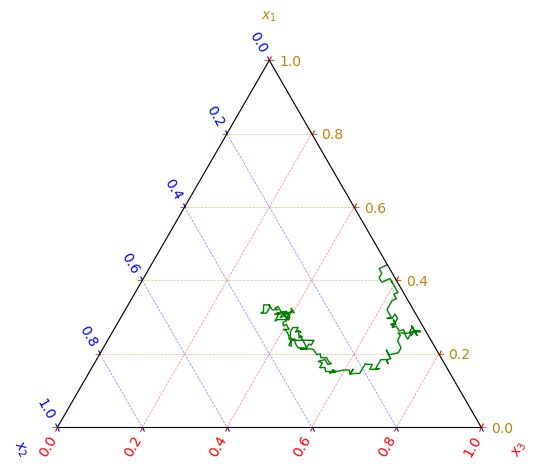

In [7]:
ternary_plot(Data[:,1],Data[:,2],Data[:,3])
gcf()

* Time series
    - Full time series

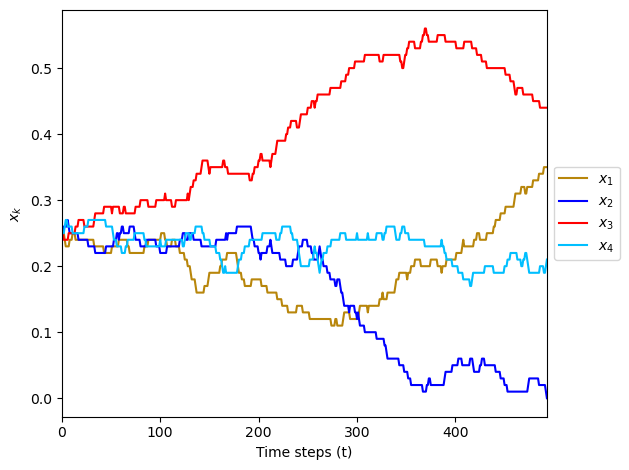

In [8]:
plt.clf()
timeseries(Data[:,1],Data[:,2],Data[:,3],Data[:,4])
gcf()

- First `xlim_value` time points 

To change the range of the x-axis, modify the `xlim_value` (it must be an integer!).

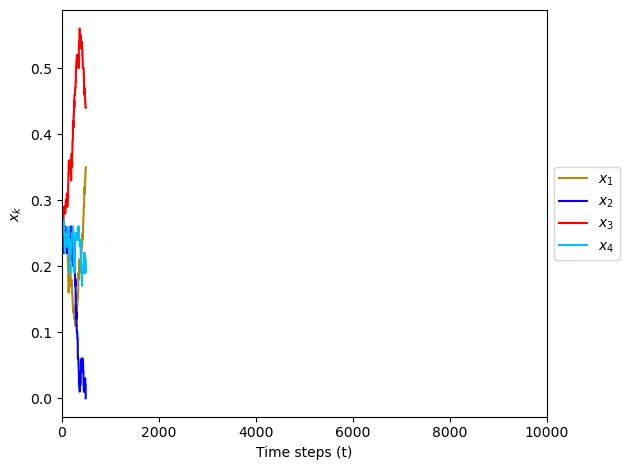

In [9]:
#xlim_value must be an integer!
xlim_value = 10000

plt.clf()
timeseries(Data[:,1],Data[:,2],Data[:,3],Data[:,4];xlim=xlim_value)
gcf()

## 4.2 Quantify
* Fractal dimension

*Note: The fractal dimension is a quantifier that takes long to calculate*

In [10]:
FD_info = fractal_dimension(Data)[1]
println("The fractal dimension of the system is: "*string(FD_info))

The fractal dimension of the system is: 1.19062


* Entropy

* Standard deviation

In [11]:
STD_info = standard_deviation(Data)
for i in 1:4
    println("The standard deviation of x"*string(i)*" is: "*string(STD_info[i]))
end

The standard deviation of x1 is: 0.055
The standard deviation of x2 is: 0.094
The standard deviation of x3 is: 0.099
The standard deviation of x4 is: 0.024


* Lyapunov exponents

*Note: The Lyapunov spectrum is a quantifier that takes long to calculate*

* Fourier spectrum

To change the range of the x-axis, modify the `xlim_val`.

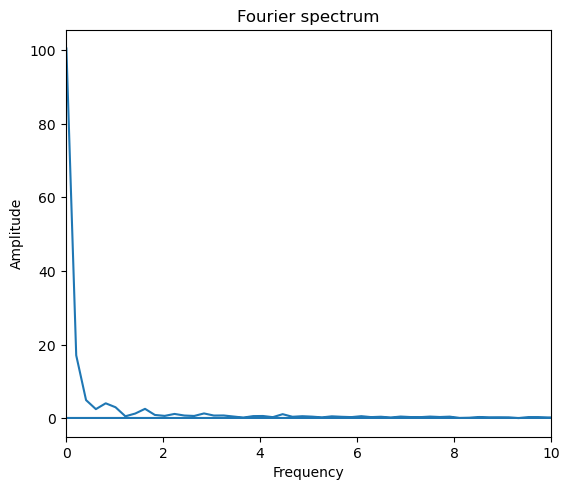

In [15]:
plt.clf()
xlim_val = 10
fourier_spectrum(Data, xlim_val)
gcf()